# EMIT-ECOSTRESS Patch-to-Pixel Model Training Demo Notebook
This notebook will walk you through how we use our patch-to-pixel models for prediction of the number of standard deviations from the mean temperature that a given pixel is as measured by ECOSTRESS from the reflectance spectra of that pixel and possibly others surrounding it as measured by EMIT.

To start, specify the absolute path to the project directory on your system where it says `project_path`. Then for the `base_data_path`, specify the relative path from the `project_path` that points to where the dataset is being stored on your system. The dataset should be organized as downloaded from the emit-ecostress Google Drive and as described in the `README` for this project. If this is the case, the `base_data_path` should not have to be changed.

In [1]:
project_path = 'C:\\Users\\danny\\Documents_Local\\Caltech_2023-2024\\CS101'

import os
base_data_path = os.path.join('Data', 'Dataset')

## Specifying the Model
We have to make at least four choices when we set up each problem.
1. What type of input to we want to use? Potential options are "raw", "PCA", or "AE", which stands for AutoEncoder.
2. What dimension of that input do we want to use? Raw and PCA data can be anywhere from 0- to 244-dimensional, and autoencoder data can be downloaded from the team's Google Drive with dimensions 2, 3, 4, 5, 8, 16, 24, and 32, and you can train your own autoencoder to get additional dimensions as well.
3. What "radius" of spectral information from other pixels do we want to consider around each pixel when we are predicting its temperature? This number can be from 0 to 191, although we recommend keeping it to 32 and below. To explain what we mean by "radius", consider that radius 0 means that we only consider the spectral information for the pixel we are predicting. Radius 1 means that we use all of the spectral information from the 8 adjacent pixels as well. Radius 2 means that we also use the spectral information of the pixels adjacent to the radius 1 pixels. In other words, radius N means that we are using spectral information from a (2N + 1)x(2N + 1) grid of pixels to predict the temperature at that pixel.
4. What type of model do we want to use? Here, the potential options are "linear", "mini", "small", "large", "attention", and "transformer". The linear option is a neural network with no hidden layers; the mini has one hidden layer with 4 units; the small has three hidden layers with 32, 16, and 8 units; and the large has six hidden layers with 512, 256, 128, 64, 32, and 16 units. The attention model uses a self-attention block followed by a linear output layer, and the transformer option uses a full transformer, although this is not yet fully implemented.

There are several other optional choices, which include the batch sizes, the number of epochs to train for, the dropout rate of the neurons in the model, and the learning rate of the optimizer, but the default choices should work reasonably well in most circumstances.

Running using cuda

radius=8, n_dimensions=8
SmallDenseNN(
  (linear1): Linear(in_features=2601, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=16, bias=True)
  (linear3): Linear(in_features=16, out_features=8, bias=True)
  (linear_output): Linear(in_features=8, out_features=1, bias=True)
  (layernorm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
  (layernorm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
  (layernorm3): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
)
Epoch 000:     Train (RMSE, K):  1.2578,  3.7311   	 Val (RMSE, K):  1.0002,  2.6809   	LR: 0.0001	Time: 1.53e+02
Epoch 001:     Train (RMSE, K):  0.65317,  1.9374   	 Val (RMSE, K):  0.79221,  2.1235   	LR: 0.0001	Time: 3.94e+02

Training interrupted by user

Running performance evaluations


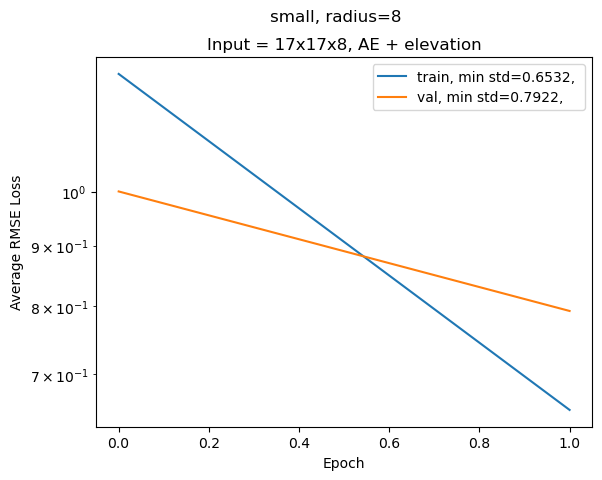

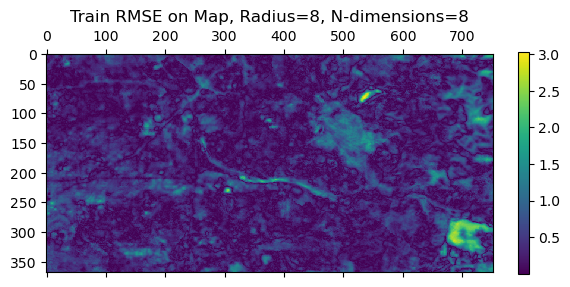

TypeError: Image data of dtype object cannot be converted to float

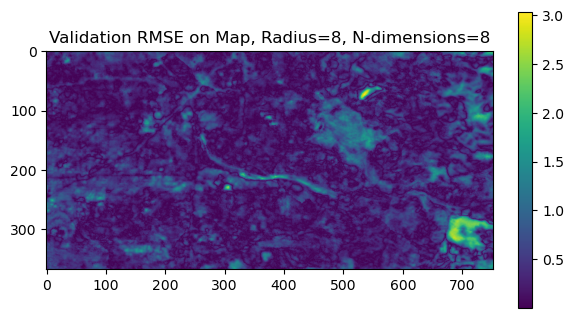

In [3]:
# specify these!
input_type = 'AE'
n_dimensions = 8
radius = 8
model_type = 'small'

# optional parameters
settings = {
    'train_batch_size': 256,
    'val_batch_size': 1024,
    'n_epochs': 10,
    'dropout_rate': 0.0,
    'learning_rate': 0.0001,
}

# this runs the training!
import sys
sys.path.append(os.path.join(project_path, 'EMIT-ECOSTRESS', 'modules'))
import utils.run_p2p
train_loss, val_loss, stats, train_loss_array, val_loss_array = (
    utils.run_p2p.train_patch_to_pixel(
        project_path,
        base_data_path,
        input_type,
        n_dimensions,
        radius,
        model_type,
        **settings,
    )
)

Now try different models and parameters and try to get below 0.5 validation RMSE!